# 4.2. The Image Classification 

Um conjunto de dados amplamente utilizado para classificação de imagens é o conjunto de dados MNIST ( LeCun et al. , 1998 ) de dígitos manuscritos.

Hoje, o MNIST serve mais como uma verificação de sanidade do que como uma referência. ImageNet ( Deng et al. , 2009 ) representa um desafio muito mais relevante. Infelizmente, o ImageNet é muito grande para muitos dos exemplos e ilustrações deste livro, pois levaria muito tempo para treinar e tornar os exemplos interativos. 

Em vez disso, concentraremos nossa discussão nas próximas seções no conjunto de dados Fashion-MNIST qualitativamente semelhante, mas muito menor ( Xiao et al. , 2017 ) , que foi lançado em 2017. Ele contém imagens de 10 categorias de roupas em 28x28 resolução de pixels.

In [ ]:
# %matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

# 4.2.1. Carregando o conjunto de dados

Como o conjunto de dados Fashion-MNIST é tão útil, todas as principais estruturas fornecem versões pré-processadas dele. Podemos baixá-lo e lê-lo na memória usando utilitários de estrutura integrados.

In [ ]:
class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

O Fashion-MNIST consiste em imagens de 10 categorias, cada uma representada por 6.000 imagens no conjunto de dados de treinamento e por 1.000 no conjunto de dados de teste. Um conjunto de dados de teste é usado para avaliar o desempenho do modelo (não deve ser usado para treinamento). Consequentemente, o conjunto de treinamento e o conjunto de teste contêm 60.000 e 10.000 imagens, respectivamente.

In [ ]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

In [ ]:
data.train[0][0].shape    # c=1 canal de cor; h=32 é a altura; w=32 é a largura.

As categorias do Fashion-MNIST possuem nomes compreensíveis. O método de conveniência a seguir converte rótulos numéricos e seus nomes.

In [ ]:
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

# 4.2.2. Lendo um minilote

Para facilitar nossa vida ao ler os conjuntos de treinamento e teste, usamos o iterador de dados integrado em vez de criar um do zero. Lembre-se de que a cada iteração, um iterador de dados lê um minilote de dados com tamanho batch_size. Também embaralhamos aleatoriamente os exemplos do iterador de dados de treinamento.

In [ ]:
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

Para ver como isso funciona, vamos carregar um minilote de imagens invocando o train_dataloader método. Ele contém 64 imagens.

In [ ]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

Vejamos o tempo que leva para ler as imagens.

In [ ]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

# 4.2.3. Visualização

Freqüentemente usaremos o conjunto de dados Fashion-MNIST. Uma função de conveniência show_imagespode ser usada para visualizar as imagens e os rótulos associados.

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

Vamos fazer bom uso disso. Em geral, é uma boa ideia visualizar e inspecionar os dados nos quais você está treinando.

In [ ]:
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

In [ ]:
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

Fashion-MNIST é um conjunto de dados de classificação de vestuário que consiste em imagens que representam 10 categorias. 

Como normalmente fazemos com imagens, nós as lemos como um tensor de forma (tamanho do lote, número de canais, altura, largura). Por enquanto, temos apenas um canal porque as imagens estão em tons de cinza (a visualização acima usa uma paleta de cores falsas para melhorar a visibilidade).

Por último, os iteradores de dados são um componente chave para um desempenho eficiente. Por exemplo, podemos usar GPUs para descompressão eficiente de imagens, transcodificação de vídeo ou outro pré-processamento. Sempre que possível, você deve contar com iteradores de dados bem implementados que exploram a computação de alto desempenho para evitar desacelerar seu ciclo de treinamento.

# Download do dataset no PyCharm

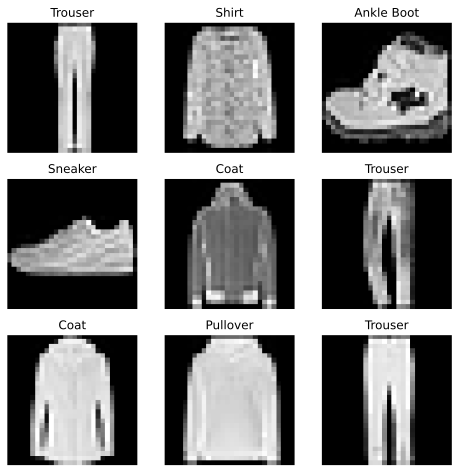

In [76]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    # root="data",
    root = '../data',
    # root=self.root,
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
  # root="data",
    root = '../data',
    # root=self.root,
    train=False,
    download=True,
    transform=ToTensor()
)



# ------------------------------------------------------------------------------------------------------

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# MNIST

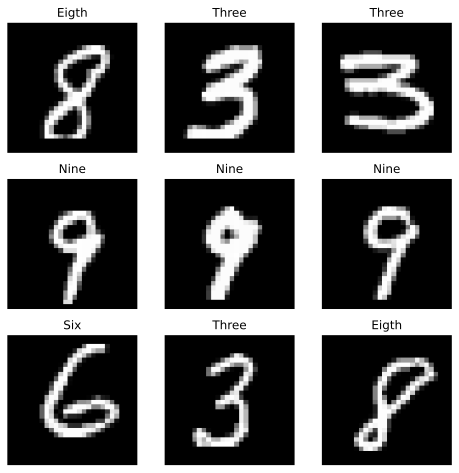

In [80]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.MNIST(
    root='../data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root='../data',
    train=False,
    download=True,
    transform=ToTensor()
)


labels_map = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eigth",
    9: "Nine",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [95]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.KMNIST(
    root='../data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.KMNIST(
    root='../data',
    train=False,
    download=True,
    transform=ToTensor()
)


labels_map = {
    0: "o",
    1: "ki",
    2: "su",
    3: "tsu",
    4: "na",
    5: "ha",
    6: "ma",
    7: "ya",
    8: "re",
    9: "wo",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

TypeError: EMNIST.__init__() missing 1 required positional argument: 'split'

# Código alterado utilizando o código acima

In [ ]:
# %matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l
from torchvision.transforms import ToTensor

from torch.utils.data import Dataset
from torchvision import datasets
import matplotlib.pyplot as plt



class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()

        self.train = datasets.FashionMNIST(
            # root="data",
            root = '../data',
            # root=self.root,
            train=True,
            download=True,
            transform=ToTensor()
        )

        self.val = datasets.FashionMNIST(
            # root="data",
            root = '../data',
            # root=self.root,
            train=False,
            download=True,
            transform=ToTensor()
        )


data = FashionMNIST()
len(data.train), len(data.val)

data.train[0][0].shape


# -------------------------------------------------------
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

# -------------------------------------------------------
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

# -------------------------------------------------------
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)


# -------------------------------------------------------
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

# -------------------------------------------------------
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)


batch = next(iter(data.val_dataloader()))
data.visualize(batch)



# Código Agrupado

In [52]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

# -------------------------------------------------------
class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

# -------------------------------------------------------
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

# -------------------------------------------------------
data.train[0][0].shape    # c=1 canal de cor; h=32 é a altura; w=32 é a largura.

# -------------------------------------------------------
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

# -------------------------------------------------------
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

# -------------------------------------------------------
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [ ]:
# -------------------------------------------------------
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

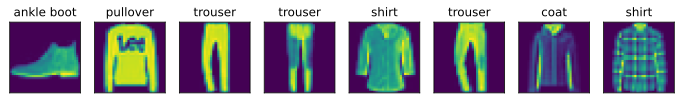

In [53]:
# -------------------------------------------------------
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

# -------------------------------------------------------
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)


batch = next(iter(data.val_dataloader()))
data.visualize(batch)

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

https://pytorch.org/vision/stable/datasets.html#fashion-mnist

??torchvision.datasets

# Exercícios

# Ex. 1.
A redução de batch_size(por exemplo, para 1) afeta o desempenho da leitura?

In [ ]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

# -------------------------------------------------------
class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=1, resize=(28, 28)):             # <<----------------------------batch_size=1
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

# -------------------------------------------------------
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

# -------------------------------------------------------
data.train[0][0].shape    # c=1 canal de cor; h=32 é a altura; w=32 é a largura.

# -------------------------------------------------------
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

# -------------------------------------------------------
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

# -------------------------------------------------------
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

In [ ]:
# -------------------------------------------------------
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

In [ ]:
# -------------------------------------------------------
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

# -------------------------------------------------------
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)


batch = next(iter(data.val_dataloader()))
data.visualize(batch)

Eleva o tempo de treinamento

# MINIST

https://pytorch.org/vision/stable/_modules/torchvision/datasets/mnist.html#FashionMNIST


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


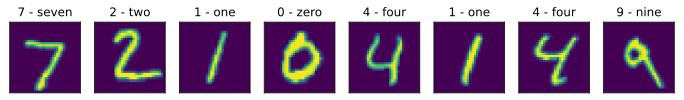

In [89]:
# https://pytorch.org/vision/stable/_modules/torchvision/datasets/mnist.html#FashionMNIST

%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

# -------------------------------------------------------
class MNIST(d2l.DataModule):  #@save
    """The MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.MNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.MNIST(
            root=self.root, train=False, transform=trans, download=True)

# -------------------------------------------------------
data = MNIST(resize=(32, 32))
len(data.train), len(data.val)

# -------------------------------------------------------
data.train[0][0].shape    # c=1 canal de cor; h=32 é a altura; w=32 é a largura.

# -------------------------------------------------------
@d2l.add_to_class(MNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = [
        "0 - zero",
        "1 - one",
        "2 - two",
        "3 - three",
        "4 - four",
        "5 - five",
        "6 - six",
        "7 - seven",
        "8 - eight",
        "9 - nine",
    ]
    return [labels[int(i)] for i in indices]

# -------------------------------------------------------
@d2l.add_to_class(MNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

# -------------------------------------------------------
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)


# -------------------------------------------------------
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

# -------------------------------------------------------
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

# -------------------------------------------------------
@d2l.add_to_class(MNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)


batch = next(iter(data.val_dataloader()))
data.visualize(batch)